In [152]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [153]:
path = os.path.abspath('.\\kaggle_givemesomecredit_train.csv')

In [154]:
df = pd.read_csv(path)
df = df.dropna(axis=0)

In [155]:
df = df.drop('id', axis = 1)

List of all the variables in the training dataset:

Dependent variable:
- output

Independent (10) variables:
- age
- 1monplus_dlqin_freq (30-59 days)
- 2monplus_dlqin_freq (60-89 days)
- 3monplus_dlqin_freq (90 days or more)
- credit_balance_ratio
- debt_ratio
- income
- num_credit_lines
- num_realestate_loans
- num_dependents
- expense

Total number of rows: 120269

In [156]:
col = ['age', 'credit_balance_ratio', 'debt_ratio', 'income', 'num_credit_lines', 'num_realestate_loans', 'dependents']
#col = list(df.columns)

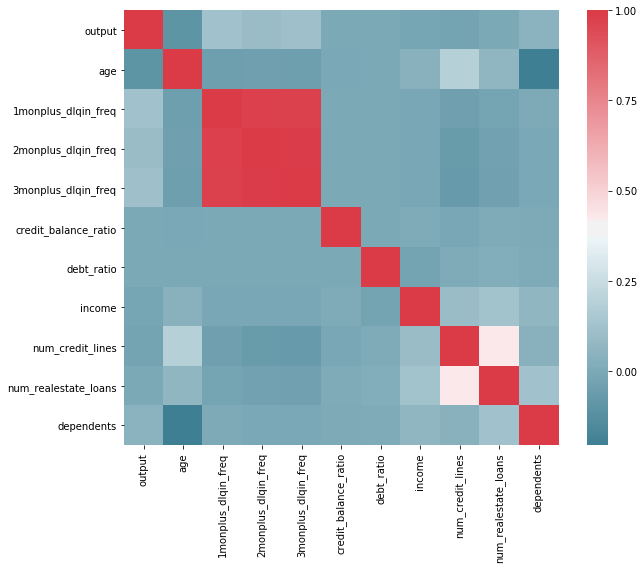

In [157]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

It can be seen from the above correlation plot that output is negatively correlated with age; it is positively correlated with one, two, and three month delinquency frequencies and number of dependents.

In [158]:
def limits(mean, std_deviation):
    lower = mean-2*std_deviation
    upper = mean+2*std_deviation
    return lower, upper

In [159]:
def hard_limits(mean, std_deviation):
    lower = mean-std_deviation
    upper = mean+std_deviation
    return lower, upper

In [160]:
for i in col:
    m = df[i].describe()['mean']
    std = df[i].describe()['std']
    l, u = limits(m, std)
    df = df[(df[i] > l) &  (df[i] < u)]

In [161]:
len(df)

104913

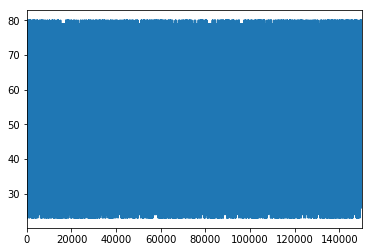

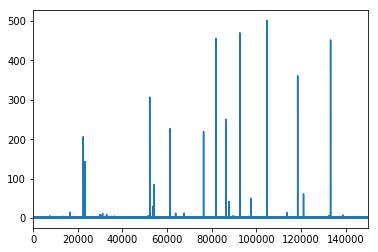

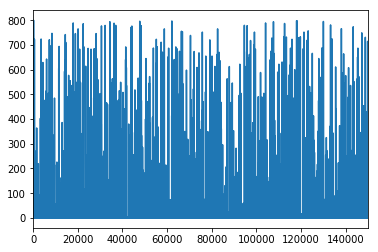

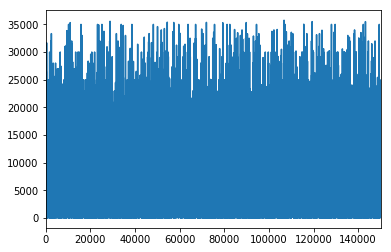

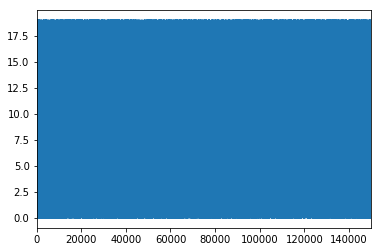

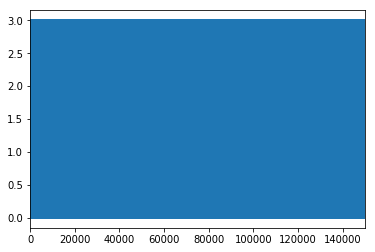

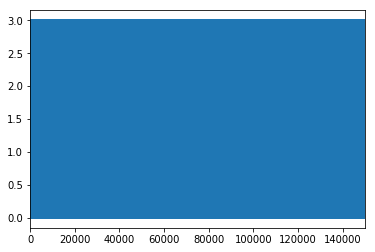

In [162]:
for i in col:
    df[i].plot()
    plt.show()

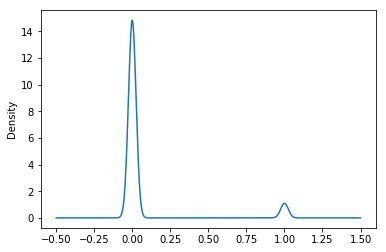

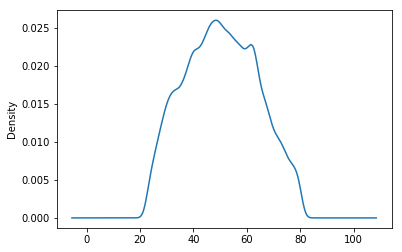

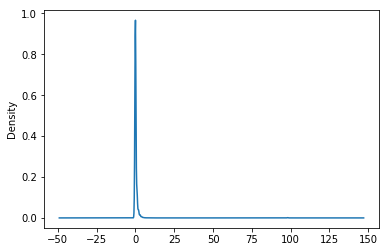

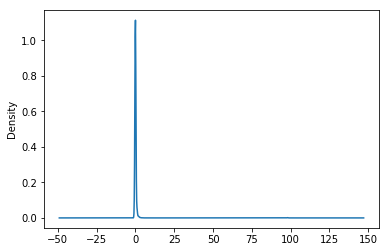

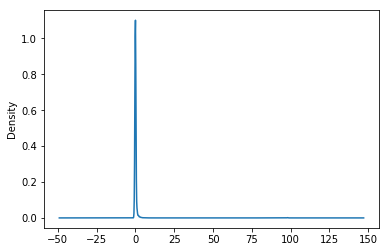

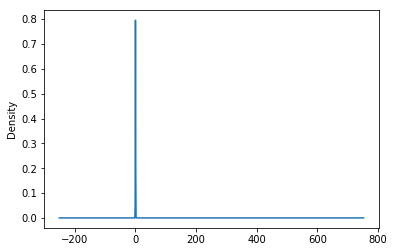

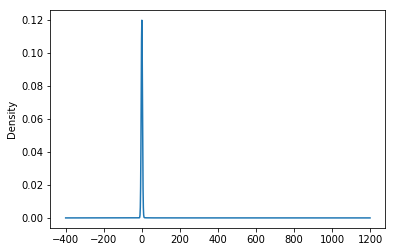

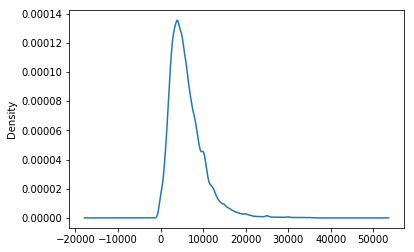

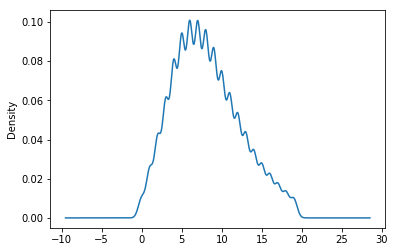

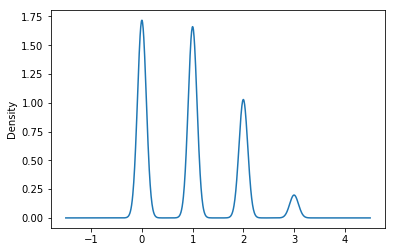

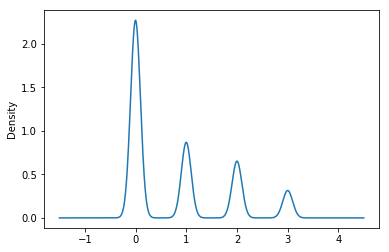

In [163]:
for i in list(df.columns):
    df[i].plot.density()
    plt.show()

In [164]:
df.columns

Index(['output', 'age', '1monplus_dlqin_freq', '2monplus_dlqin_freq',
       '3monplus_dlqin_freq', 'credit_balance_ratio', 'debt_ratio', 'income',
       'num_credit_lines', 'num_realestate_loans', 'dependents'],
      dtype='object')

In [165]:
for i in list(df.columns):
    print('\n', i)
    print('skewness', df[i].skew())
    print(df[i].describe())


 output
skewness 3.40957001934
count    104913.000000
mean          0.068724
std           0.252985
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: output, dtype: float64

 age
skewness 0.0687389849986
count    104913.000000
mean         50.412151
std          13.661594
min          23.000000
25%          40.000000
50%          50.000000
75%          61.000000
max          80.000000
Name: age, dtype: float64

 1monplus_dlqin_freq
skewness 27.1290915022
count    104913.000000
mean          0.374205
std           3.443552
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: 1monplus_dlqin_freq, dtype: float64

 2monplus_dlqin_freq
skewness 28.5023873074
count    104913.000000
mean          0.184972
std           3.392818
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: 2monplus

In [166]:
high_skew_col = ['1monplus_dlqin_freq', 'credit_balance_ratio', 'debt_ratio']

In [167]:
for i in high_skew_col:
    m = df[i].describe()['mean']
    std = df[i].describe()['std']
    l, u = limits(m, std)
    df = df[(df[i] > l) &  (df[i] < u)]

In [168]:
len(df[(df['output'] == 1)])

7095

In [169]:
for i in list(df.columns):
    print('\n', i)
    print('skewness', df[i].skew())
    print(df[i].describe())


 output
skewness 3.42796887034
count    104137.000000
mean          0.068131
std           0.251972
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: output, dtype: float64

 age
skewness 0.0682179598266
count    104137.000000
mean         50.452001
std          13.639415
min          23.000000
25%          40.000000
50%          50.000000
75%          61.000000
max          80.000000
Name: age, dtype: float64

 1monplus_dlqin_freq
skewness 3.80306692099
count    104137.00000
mean          0.25574
std           0.69560
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           7.00000
Name: 1monplus_dlqin_freq, dtype: float64

 2monplus_dlqin_freq
skewness 7.04016470123
count    104137.000000
mean          0.067901
std           0.332817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: 2monplus_dlqin_f

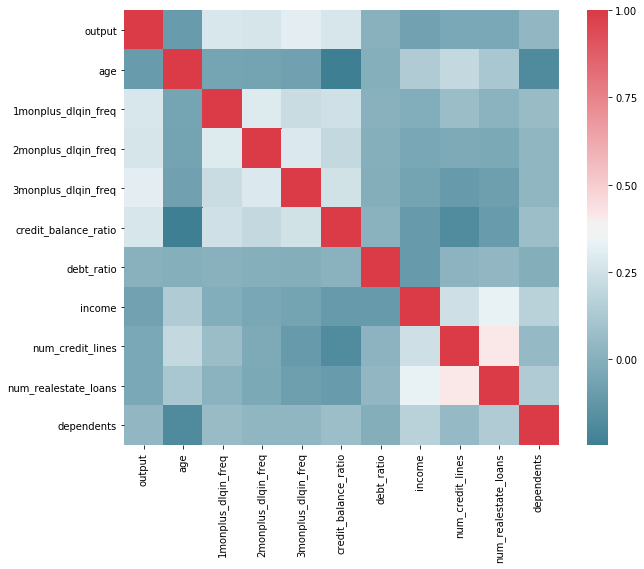

In [170]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [171]:
df['expense'] = df['debt_ratio']*df['income']
df.head()

,output,age,1monplus_dlqin_freq,2monplus_dlqin_freq,3monplus_dlqin_freq,credit_balance_ratio,debt_ratio,income,num_credit_lines,num_realestate_loans,dependents,expense
1,0,40,0,0,0,0.957151,0.121876,2600.0,4,0,1.0,316.878123
2,0,38,1,0,1,0.658180,0.085113,3042.0,2,0,0.0,258.914887
3,0,30,0,0,0,0.233810,0.036050,3300.0,5,0,0.0,118.963951
5,0,74,0,0,0,0.213179,0.375607,3500.0,3,1,1.0,1314.624392
7,0,39,0,0,0,0.754464,0.209940,3500.0,8,0,0.0,734.790059


In [214]:
df=df.reset_index()
df.head()

,index,output,age,1monplus_dlqin_freq,2monplus_dlqin_freq,3monplus_dlqin_freq,credit_balance_ratio,debt_ratio,income,num_credit_lines,num_realestate_loans,dependents,expense,avgcardspending
0,1,0,40,0,0,0,0.957151,0.121876,2600.0,4,0,1.0,316.878123,79.219531
1,2,0,38,1,0,1,0.658180,0.085113,3042.0,2,0,0.0,258.914887,129.457443
2,3,0,30,0,0,0,0.233810,0.036050,3300.0,5,0,0.0,118.963951,23.792790
3,5,0,74,0,0,0,0.213179,0.375607,3500.0,3,1,1.0,1314.624392,438.208130
4,7,0,39,0,0,0,0.754464,0.209940,3500.0,8,0,0.0,734.790059,91.848757


In [217]:
for i in range(len(df)):
    if df.loc[i,'num_credit_lines'] > 0.0:
        df.loc[i,'avgcardspending']=df.loc[i,'expense']/df.loc[i,'num_credit_lines']
    else : df.loc[i,'avgcardspending']=0.0

In [221]:
df.head()

,index,output,age,1monplus_dlqin_freq,2monplus_dlqin_freq,3monplus_dlqin_freq,credit_balance_ratio,debt_ratio,income,num_credit_lines,num_realestate_loans,dependents,expense,avgcardspending
0,1,0,40,0,0,0,0.957151,0.121876,2600.0,4,0,1.0,316.878123,79.219531
1,2,0,38,1,0,1,0.658180,0.085113,3042.0,2,0,0.0,258.914887,129.457443
2,3,0,30,0,0,0,0.233810,0.036050,3300.0,5,0,0.0,118.963951,23.792790
3,5,0,74,0,0,0,0.213179,0.375607,3500.0,3,1,1.0,1314.624392,438.208130
4,7,0,39,0,0,0,0.754464,0.209940,3500.0,8,0,0.0,734.790059,91.848757


In [227]:
df=df.drop('index',axis=1)
df.head()

,output,age,1monplus_dlqin_freq,2monplus_dlqin_freq,3monplus_dlqin_freq,credit_balance_ratio,debt_ratio,income,num_credit_lines,num_realestate_loans,dependents,expense,avgcardspending
0,0,40,0,0,0,0.957151,0.121876,2600.0,4,0,1.0,316.878123,79.219531
1,0,38,1,0,1,0.658180,0.085113,3042.0,2,0,0.0,258.914887,129.457443
2,0,30,0,0,0,0.233810,0.036050,3300.0,5,0,0.0,118.963951,23.792790
3,0,74,0,0,0,0.213179,0.375607,3500.0,3,1,1.0,1314.624392,438.208130
4,0,39,0,0,0,0.754464,0.209940,3500.0,8,0,0.0,734.790059,91.848757


In [172]:
df['age'].describe()

count    104137.000000
mean         50.452001
std          13.639415
min          23.000000
25%          40.000000
50%          50.000000
75%          61.000000
max          80.000000
Name: age, dtype: float64

In [173]:
m = df['age'].describe()['mean']
std = df['age'].describe()['std']
l = m-2*std
u = m+2*std
df = df[(df['age'] > l) &  (df['age'] < u)]

In [174]:
len(df)

101680

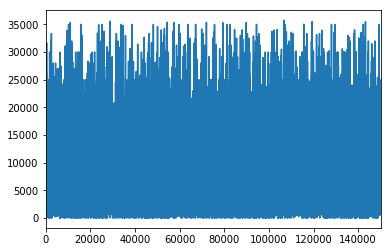

In [177]:
df['income'].plot()
plt.show()

In [196]:
df['income'].skew()

1.8379844954062627

In [228]:
#df=df.take(np.random.permutation(len(df))[:20000])
X_sample=df.iloc[:, 1:].values
#plot(X_sample[:,2])
#plt.show()

In [292]:
y = df.iloc[:, 0].values
y.size

101680

In [231]:
df.columns

Index(['output', 'age', '1monplus_dlqin_freq', '2monplus_dlqin_freq',
       '3monplus_dlqin_freq', 'credit_balance_ratio', 'debt_ratio', 'income',
       'num_credit_lines', 'num_realestate_loans', 'dependents', 'expense',
       'avgcardspending'],
      dtype='object')

In [289]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [101680, 12]

In [233]:
y_pred = classifier.predict(X_test)

In [234]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
X_test

array([[  6.20000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   3.97383123e+03,   3.61257384e+02],
       [  3.60000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          2.00000000e+00,   6.08902575e+02,   1.21780515e+02],
       [  2.80000000e+01,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   6.66944424e+02,   3.33472212e+02],
       ..., 
       [  4.90000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   6.18871070e+02,   1.54717768e+02],
       [  2.60000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.40000000e+01,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   6.81829544e+02,   1.70457386e+02]])

C:\Users\raunak\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


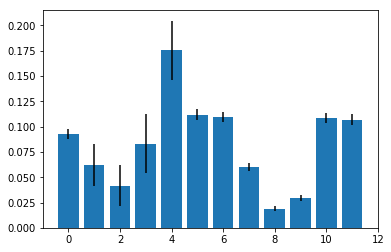

In [243]:
importance = classifier.feature_importances_
importance = pd.DataFrame(importance, index=df.iloc[:, 1:].columns, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in classifier.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

credit bal, debt_ratio and costs are the most important variables

In [238]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [239]:
cm

array([[23462,   251],
       [ 1405,   302]], dtype=int64)

In [240]:
(cm[0][0]+cm[0][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

0.93284815106215579

In [241]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.58316682968077715

In [244]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [271]:
y_pred = classifier.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5849288692987028

Using a pipeline

In [272]:
import sklearn.pipeline
select = sklearn.feature_selection.SelectKBest(k='all')
clf = sklearn.ensemble.RandomForestClassifier()
from sklearn.linear_model import LogisticRegression

steps = [('feature_selection', select),
        ('random_forest', clf)]
pipeline = sklearn.pipeline.Pipeline(steps)
pipeline.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k='all', score_func=<function f_classif at 0x00000164B7EF59D8>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [301]:
import sklearn.pipeline
select = sklearn.feature_selection.SelectKBest(k='all')
clf = sklearn.ensemble.RandomForestClassifier()
steps = [('feature_selection', select),
        ('random_forest', clf)]
pipeline = sklearn.pipeline.Pipeline(steps)
pipeline.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k='all', score_func=<function f_classif at 0x00000164B7EF59D8>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decr...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [249]:
y_pred = pipeline.predict( X_test )

In [250]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.57431165664408423

In [270]:
import sklearn.grid_search
parameters = dict(feature_selection__k=[11, 6], 
              random_forest__n_estimators=[3, 6, 9,10],
              random_forest__min_samples_split=[2, 3, 4, 5,10])

cv = sklearn.grid_search.GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [273]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5849288692987028

In [257]:
print(cv.best_params_)

{'feature_selection__k': 11, 'random_forest__min_samples_split': 10, 'random_forest__n_estimators': 9}


RF with 500 trees gives a poor performance. Lets now try another ensemble model adaboost.

In [274]:
df.columns

Index(['output', 'age', '1monplus_dlqin_freq', '2monplus_dlqin_freq',
       '3monplus_dlqin_freq', 'credit_balance_ratio', 'debt_ratio', 'income',
       'num_credit_lines', 'num_realestate_loans', 'dependents', 'expense',
       'avgcardspending'],
      dtype='object')

In [302]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
h2o.init()

In [317]:
train=h2o.H2OFrame(df[:70000])
test=h2o.H2OFrame(df[70000:])
x=train.columns
y="output"
x.remove(y)
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [333]:
# Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=50,
                                 nfolds=5,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [328]:
my_gbm = H2OGradientBoostingEstimator(distribution="bernoulli",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.2,
                                      nfolds=5,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=x, y=y, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [321]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(x, y, training_frame= train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [334]:
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomi",
                                       base_models=[my_gbm, my_rf])
ensemble.train(x=x, y=y, training_frame=train)

# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(test)

stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [335]:
perf_gbm_test = my_gbm.model_performance(test)
perf_rf_test = my_rf.model_performance(test)
baselearner_best_auc_test = max(perf_gbm_test.auc(), perf_rf_test.auc())
stack_auc_test = perf_stack_test.auc()
print("Best Base-learner Test AUC:  {0}".format(baselearner_best_auc_test))
print("Ensemble Test AUC:  {0}".format(stack_auc_test))

Best Base-learner Test AUC:  0.8483257063206887
Ensemble Test AUC:  0.8502735471114821


In [337]:
perf_rf_test.auc()

0.8348903598938182

In [281]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X = scale(X_sample)
pca = PCA(n_components=12)
pca.fit(X)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [285]:
var

array([ 0.19633649,  0.16182905,  0.11802563,  0.09750673,  0.08008498,
        0.06700778,  0.06084592,  0.05899683,  0.05435391,  0.05198174,
        0.04584142,  0.00718952])

In [277]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([ 19.63,  35.81,  47.61,  57.36,  65.37,  72.07,  78.15,  84.05,
        89.49,  94.69,  99.27,  99.99])

In [278]:
plt.plot(var1)

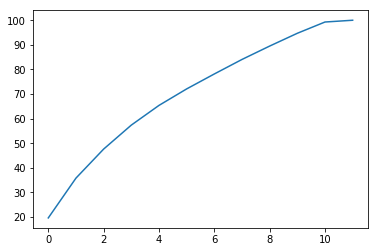

In [279]:
plt.show()

In [287]:
pca = PCA(n_components=9)
pca.fit(X)
X1=pca.fit_transform(X)

In [296]:
X1.shape

(101680, 9)

In [297]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.25, random_state = 0)

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [298]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [299]:
y_pred = classifier.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.58994596607829164

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=200)
bdt.fit(X_train, y_train)

In [ ]:
y_pred=bdt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

Lets see how a single linear model SVC performs

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)